
# Project: Investigate The Dataset - [TMDB Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

TMDb movie data

(cleaned from original data on Kaggle)

Overview and notes : 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

There are some odd characters in the ‘cast’ column.

Don’t worry about cleaning them. You can leave them as is.

The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Question(s) for Analysis

Which genres are most popular from year to year?

What kinds of properties are associated with movies that have high revenues?

In [207]:

import pandas as pd 
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling



### General Properties


### Data Assessing

number of samples

number of columns

duplicate rows

datatypes of columns

features with missing values

number of non-null unique values for features t

what those unique values are and counts for each

In [208]:
# Load your data and print out a few lines. Perform operations to inspect data

df = pd.read_csv('tmdb-movies-data.csv')
df.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [210]:
df.shape

(10866, 21)

In [211]:
df.duplicated().sum()


1

In [212]:
df.isnull().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [213]:
df.nunique()


id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


### Data Cleaning

Here I will preform some tasks to clean the data 

First: dropping the Extraneous Columns as i wont be using them in my analysis

second: dropping the duplicates
 
Third : dropping the null values



Dropping the Extraneous Columns as i wont be using them in my analysis


In [214]:
# drop columns from the dataset
df.drop(['id', 'imdb_id', 'homepage','tagline','overview','keywords','budget','revenue'],axis = 1 , inplace = True )

# confirm changes
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


Dropping the duplicates

In [215]:
df.drop_duplicates(inplace=True)
# print number of duplicates again to confirm dedupe - should both be 0
print(df.duplicated().sum())

0


dropping the null values

In [216]:
df.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [217]:
df.dropna(inplace=True)

In [218]:
# checks if any of columns have null values - should print False
df.isnull().sum().any()

False

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   original_title        9772 non-null   object 
 2   cast                  9772 non-null   object 
 3   director              9772 non-null   object 
 4   runtime               9772 non-null   int64  
 5   genres                9772 non-null   object 
 6   production_companies  9772 non-null   object 
 7   release_date          9772 non-null   object 
 8   vote_count            9772 non-null   int64  
 9   vote_average          9772 non-null   float64
 10  release_year          9772 non-null   int64  
 11  budget_adj            9772 non-null   float64
 12  revenue_adj           9772 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.0+ MB


In [220]:
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


Here there are more than one col which has several value : for example the genres , cast and production_companies colmuns 

i will split each of genres , cast and production companies and take the first value of the split as the main value of the col

In [221]:
df['main_genre']=df.genres.str.split(pat='|',expand=True)[0]

df['main_actor']=df.cast.str.split(pat='|',expand=True)[0]

df['main_production_company']=df.production_companies.str.split(pat='|',expand=True)[0]

In [222]:
df.drop(['genres','production_companies','cast'], axis=1, inplace=True)


In [223]:
df['profit']=df.revenue_adj-df.budget_adj


In [224]:
# To convert the release data col in order to extract the month from it 
df.release_date=pd.to_datetime(df.release_date)


In [225]:

#This is to extract year from the release_date col
df['month'] = pd.DatetimeIndex(df['release_date']).month

In [226]:
df.head(2)


,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,main_actor,main_production_company,profit,month
0,32.985763,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Chris Pratt,Universal Studios,1.254446e+09,6
1,28.419936,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Tom Hardy,Village Roadshow Pictures,2.101614e+08,5


In [227]:
df.describe()


,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,month
count,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9.772000e+03,9772.000000
mean,0.694721,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07,3.763710e+07,6.875358
std,1.036931,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08,1.314756e+08,3.410691
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08,1.000000
25%,0.232710,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.000000
50%,0.419762,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00,0.000000e+00,7.000000
75%,0.776408,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07,2.029698e+07,10.000000
max,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09,12.000000


ok here i will organize the profit col as i want to know which will be considered as a high profit or low



In [228]:
df['profit'].describe()

count    9.772000e+03
mean     3.763710e+07
std      1.314756e+08
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      2.029698e+07
max      2.750137e+09
Name: profit, dtype: float64

as we see we have a problem here which is that we find that that many movies have the value "0" in the revenue_adj and the budget_adj columns the profit is also not accurate as a result. These rows needs to be dropped

In [229]:
# rz stands for remove zeros

df_rz = df.query('budget_adj != 0 and revenue_adj != 0 ')
df_rz.shape



(3805, 15)

In [230]:
df_rz.describe()['profit']


count    3.805000e+03
mean     9.399617e+07
std      1.950332e+08
min     -4.139124e+08
25%     -1.420000e+06
50%      2.851334e+07
75%      1.090266e+08
max      2.750137e+09
Name: profit, dtype: float64

here i will make a function to create levels for a desired column



In [231]:
def col_levels(df,col_name,bin_names):
    bins_edges = []
    for i in df.describe()[col_name]:
        bins_edges.append(i)

    bins_edges = bins_edges[3:]

    # Labels for the four acidity level groups

    df[col_name+ '_levels'] = pd.cut(df[col_name], bins_edges, labels=bin_names)

    return df

In [232]:
bin_names = ['extreem loss','loss','mid','High' ]
df_rz = col_levels(df_rz,'profit',bin_names)
df_rz.head(2)


C:\Users\dell\AppData\Local\Temp\ipykernel_3868\3297631212.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name+ '_levels'] = pd.cut(df[col_name], bins_edges, labels=bin_names)


,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,main_actor,main_production_company,profit,month,profit_levels
0,32.985763,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Chris Pratt,Universal Studios,1.254446e+09,6,High
1,28.419936,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Tom Hardy,Village Roadshow Pictures,2.101614e+08,5,High


In [233]:
df_rz.describe()['profit']

count    3.805000e+03
mean     9.399617e+07
std      1.950332e+08
min     -4.139124e+08
25%     -1.420000e+06
50%      2.851334e+07
75%      1.090266e+08
max      2.750137e+09
Name: profit, dtype: float64

In [234]:
df.describe()['popularity']

count    9772.000000
mean        0.694721
std         1.036931
min         0.000188
25%         0.232710
50%         0.419762
75%         0.776408
max        32.985763
Name: popularity, dtype: float64

In [235]:
bin_names = ['very low','low','mid','High' ]
df=col_levels(df,'popularity',bin_names)
df.head()

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,main_actor,main_production_company,profit,month,popularity_levels
0,32.985763,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Chris Pratt,Universal Studios,1.254446e+09,6,High
1,28.419936,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Tom Hardy,Village Roadshow Pictures,2.101614e+08,5,High
2,13.112507,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Shailene Woodley,Summit Entertainment,1.704191e+08,3,High
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Harrison Ford,Lucasfilm,1.718723e+09,12,High
4,9.335014,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Vin Diesel,Universal Pictures,1.210949e+09,4,High


Now we can answer many questions which will be in the EDA section



<a id='eda'></a>
## Exploratory Data Analysis






Here i will answer some basic question before going to see important relations among the variables



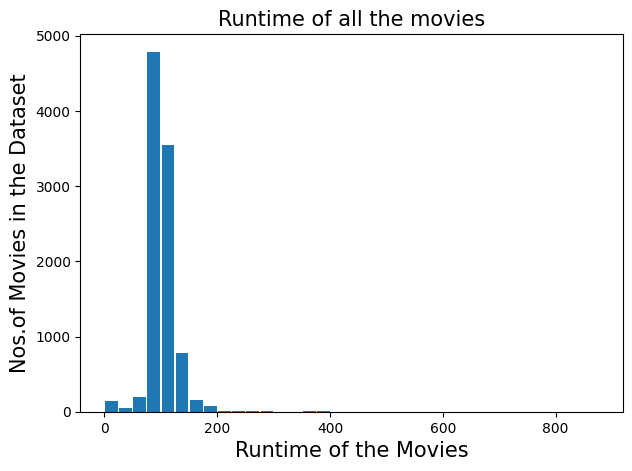

In [282]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(7,5), dpi = 100 )

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

The distribution of the above formed graph is positively skewed or right skewed! Most of the movies are timed between 80 to 120 minutes. Almost 5000 and more no.of movies fall in this criteria.

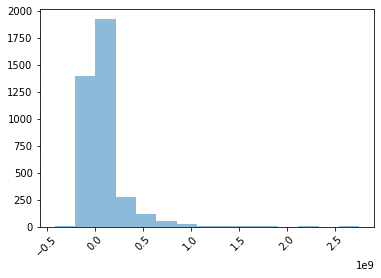

In [236]:
df_rz['profit'].hist(bins = 15 , alpha = 0.5 , grid = False , xrot = 45);

The most frequent directors in each profit category:



In [237]:
df_rz.groupby('profit_levels').agg(lambda x:x.value_counts().index[0])['director']


profit_levels
extreem loss        Renny Harlin
loss                 Kevin Smith
mid               Clint Eastwood
High            Steven Spielberg
Name: director, dtype: object

Steven Spielberg is the director with most movies that made high profit.



Here you can find the most frequent genre in each profit category:


In [238]:
df_rz.groupby('profit_levels').agg(lambda x:x.value_counts().index[0])['main_genre']


profit_levels
extreem loss     Drama
loss             Drama
mid             Comedy
High            Action
Name: main_genre, dtype: object

we see here that high profit movies will likly be action movies



Here you can find the years of the biggest losses and largest profits:



In [239]:
df_rz.groupby('profit_levels').agg(lambda x:x.value_counts().index[0])['release_year']


profit_levels
extreem loss    2009
loss            2011
mid             2005
High            2014
Name: release_year, dtype: int64

The year 2014 is the year with the most profit movies



### Relationship between Important Variables


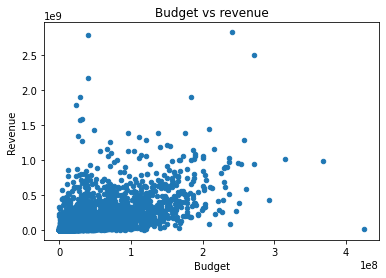

In [243]:
df_rz.plot.scatter(x = 'budget_adj', y = 'revenue_adj');
plt.title("Budget vs revenue");
plt.xlabel("Budget");
plt.ylabel("Revenue");

We can say that investment seems to affect returns positively for a movie (posstive correlation).



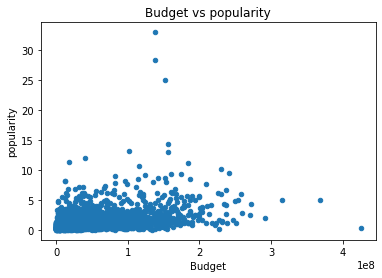

In [244]:
df_rz.plot.scatter(x = 'budget_adj', y = 'popularity');
plt.title("Budget vs popularity");
plt.xlabel("Budget");
plt.ylabel("popularity");

As budget increases, the popularity seems to show an increasing trend.



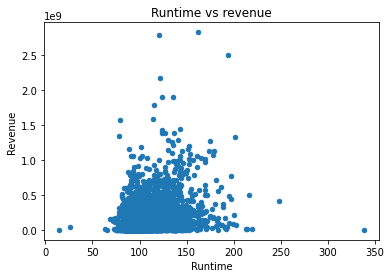

In [245]:
df_rz.plot.scatter(x = 'runtime', y = 'revenue_adj');
plt.title("Runtime vs revenue");
plt.xlabel("Runtime");
plt.ylabel("Revenue");

We observe that movies close to a runtime of 130 minutes are possible to register higher returns.



### Research Question 1 (Which year has the most popular movies?)


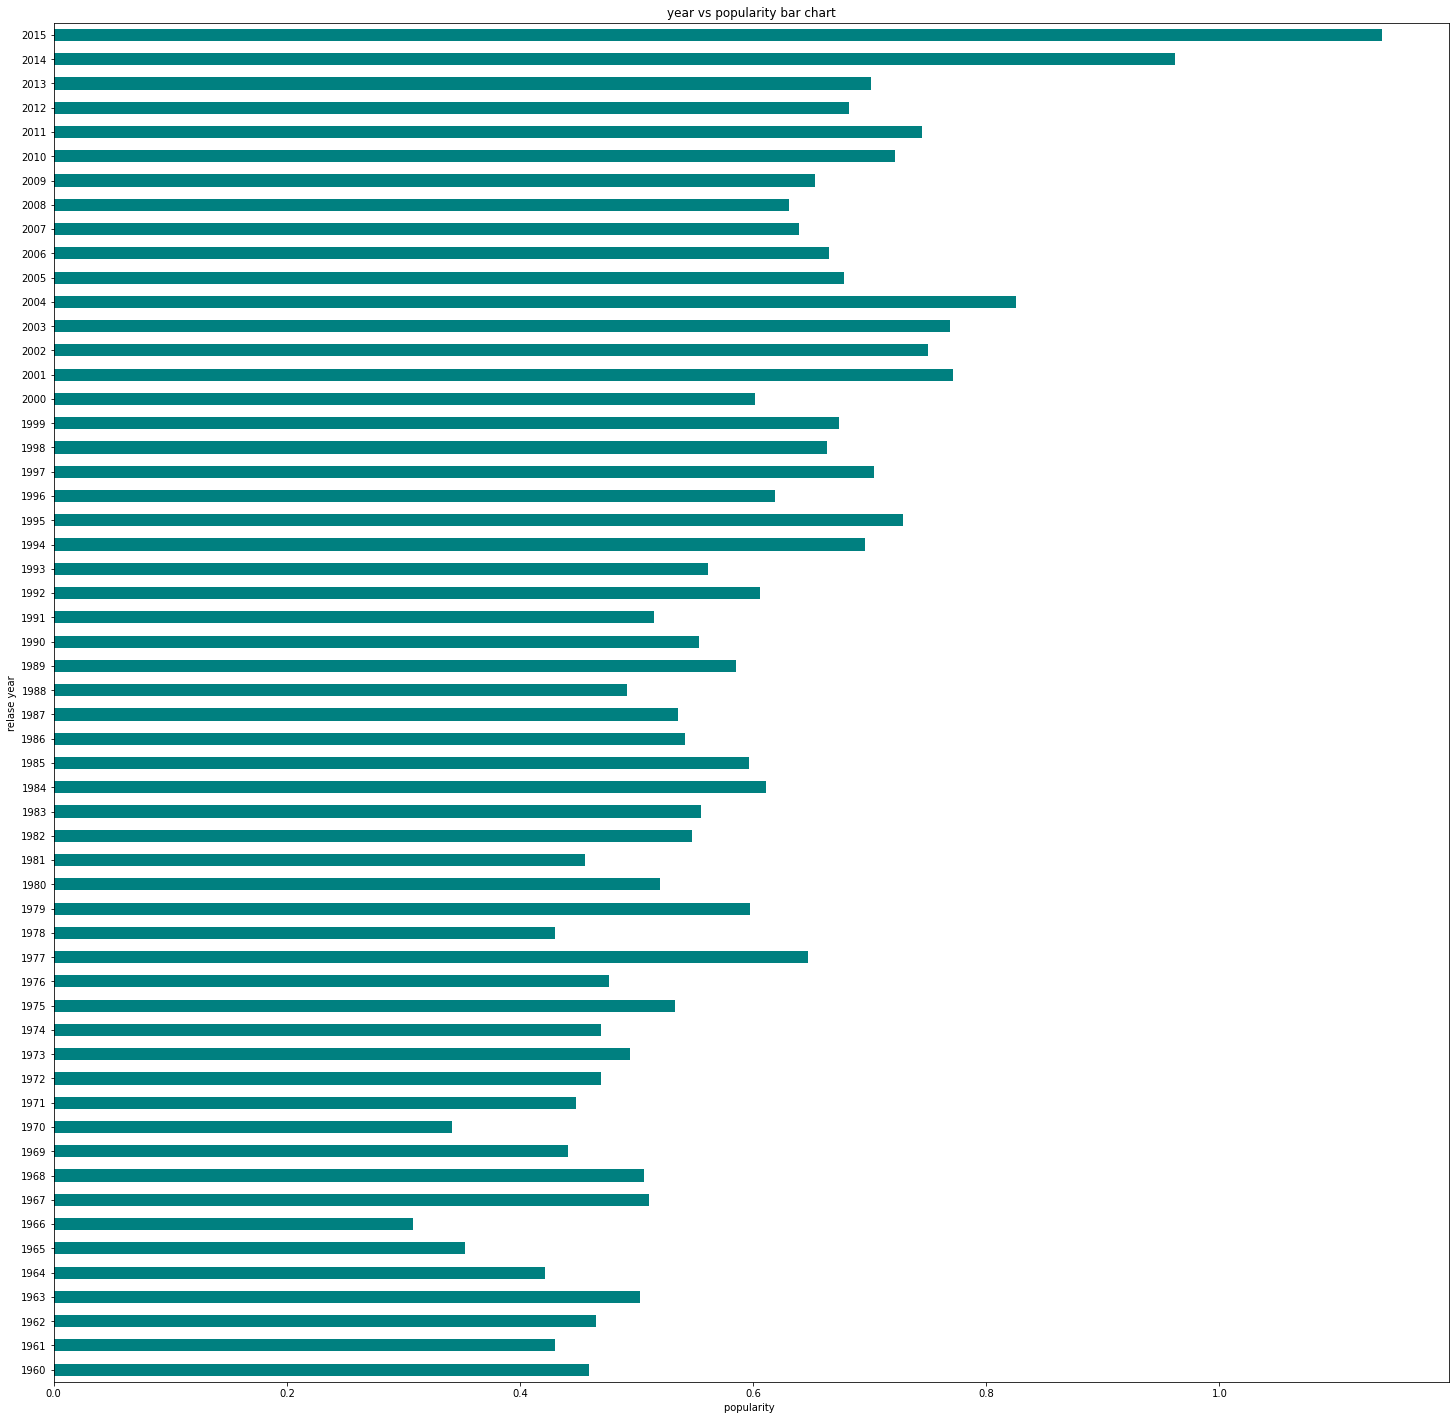

In [256]:
yvpm=df.groupby('release_year')['popularity'].mean()
yvpm.plot(kind="barh",figsize=(25,25),color = 'teal' );
plt.title("year vs popularity bar chart");
plt.ylabel("relase year");
plt.xlabel("popularity ");


from the graph plot of (2015) and (2014) are the years with the most popular movies .



### Research Question 2 (What are the characteristics associated high profit movies ?)


In [257]:
df_m = df_rz.query('profit_levels == "High"')
df_m.head()


,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,main_actor,main_production_company,profit,month,profit_levels
0,32.985763,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Chris Pratt,Universal Studios,1.254446e+09,6,High
1,28.419936,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Tom Hardy,Village Roadshow Pictures,2.101614e+08,5,High
2,13.112507,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Shailene Woodley,Summit Entertainment,1.704191e+08,3,High
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Harrison Ford,Lucasfilm,1.718723e+09,12,High
4,9.335014,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Vin Diesel,Universal Pictures,1.210949e+09,4,High


In [258]:
df_m.describe()


,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,month
count,951.000000,951.000000,951.000000,951.000000,951.000000,9.510000e+02,9.510000e+02,9.510000e+02,951.000000
mean,2.247750,116.398528,1281.132492,6.495794,1999.129338,7.832576e+07,4.015727e+08,3.232469e+08,7.497371
std,2.349182,22.658424,1362.869723,0.699340,12.984569,5.712787e+07,2.988253e+08,2.787612e+08,3.232034
min,0.131526,69.000000,13.000000,4.200000,1960.000000,2.248029e+02,1.169945e+08,1.090277e+08,1.000000
25%,1.022218,99.000000,356.500000,6.000000,1992.000000,3.343217e+07,2.110925e+08,1.500418e+08,5.000000
50%,1.641739,113.000000,774.000000,6.500000,2002.000000,6.584719e+07,3.082597e+08,2.264043e+08,7.000000
75%,2.688673,129.000000,1708.500000,7.000000,2010.000000,1.115397e+08,4.888207e+08,3.915575e+08,11.000000
max,32.985763,248.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09,12.000000



Here we see that :-

The mean run time of the high profit movies is 116 min

The mean budget for movies with high profit movies is 7.827280e+07

More information will be disscussed in the coming cells

In [259]:
s=df_m['main_genre'].value_counts()


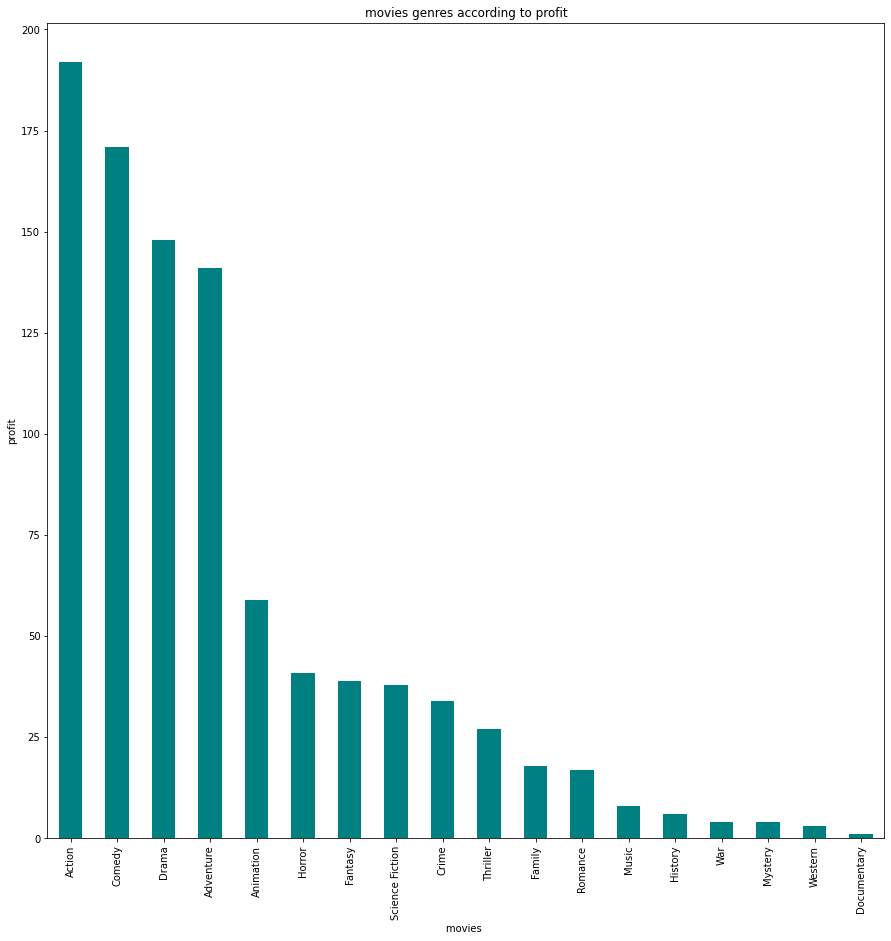

In [265]:
s.plot(kind='bar',figsize=(15,15),color = 'teal' )
plt.title("movies genres according to profit");
plt.ylabel("profit");
plt.xlabel("movies ");

Here we see that the top four genres of the high profit movies are : Action , comedy , Drama , Adventrue



In [266]:
j=df_m['main_production_company'][:50].value_counts()


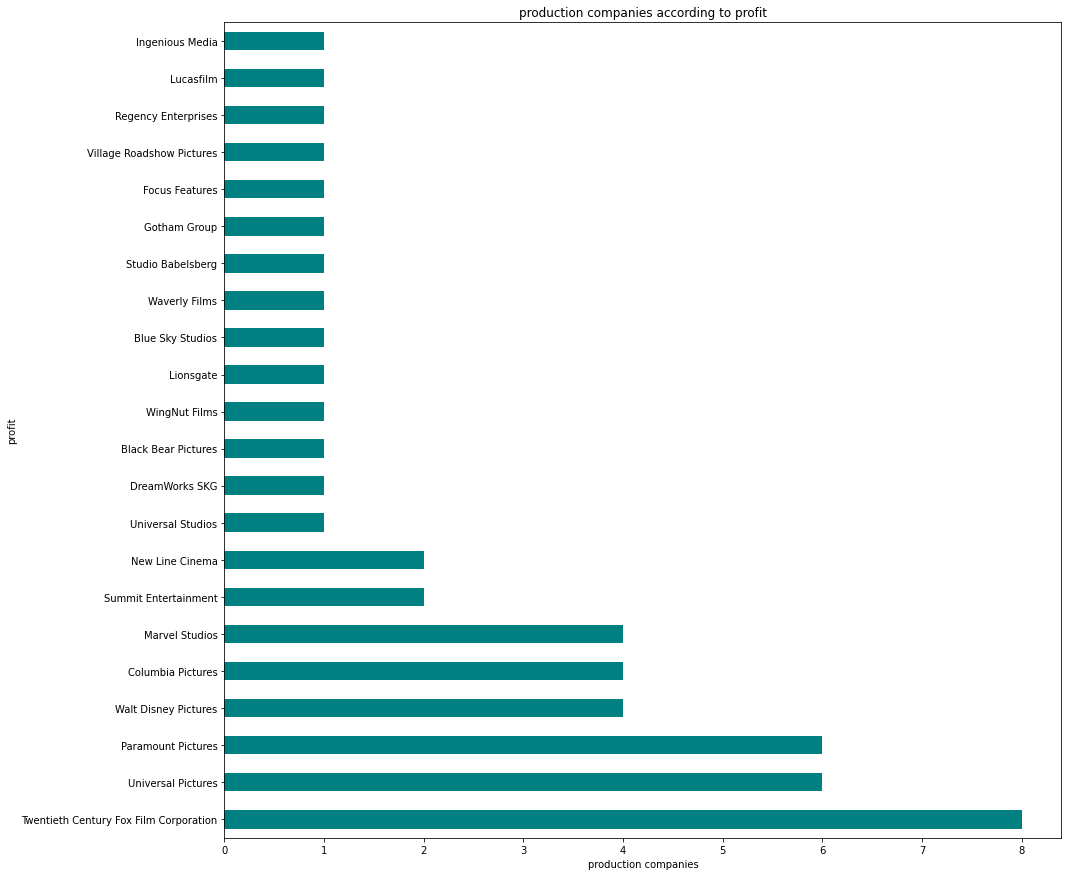

In [269]:
j.plot(kind='barh',figsize=(15,15),color = 'teal');
plt.title("production companies according to profit");
plt.ylabel("profit");
plt.xlabel("production companies");

Here we see that the top four production companies of the high profit movies are : Twentieth century fox film corporation , universal pictures , paramount pictures , walt disney pictures

### Research Question 3 (Find which movie is most favoured by people)


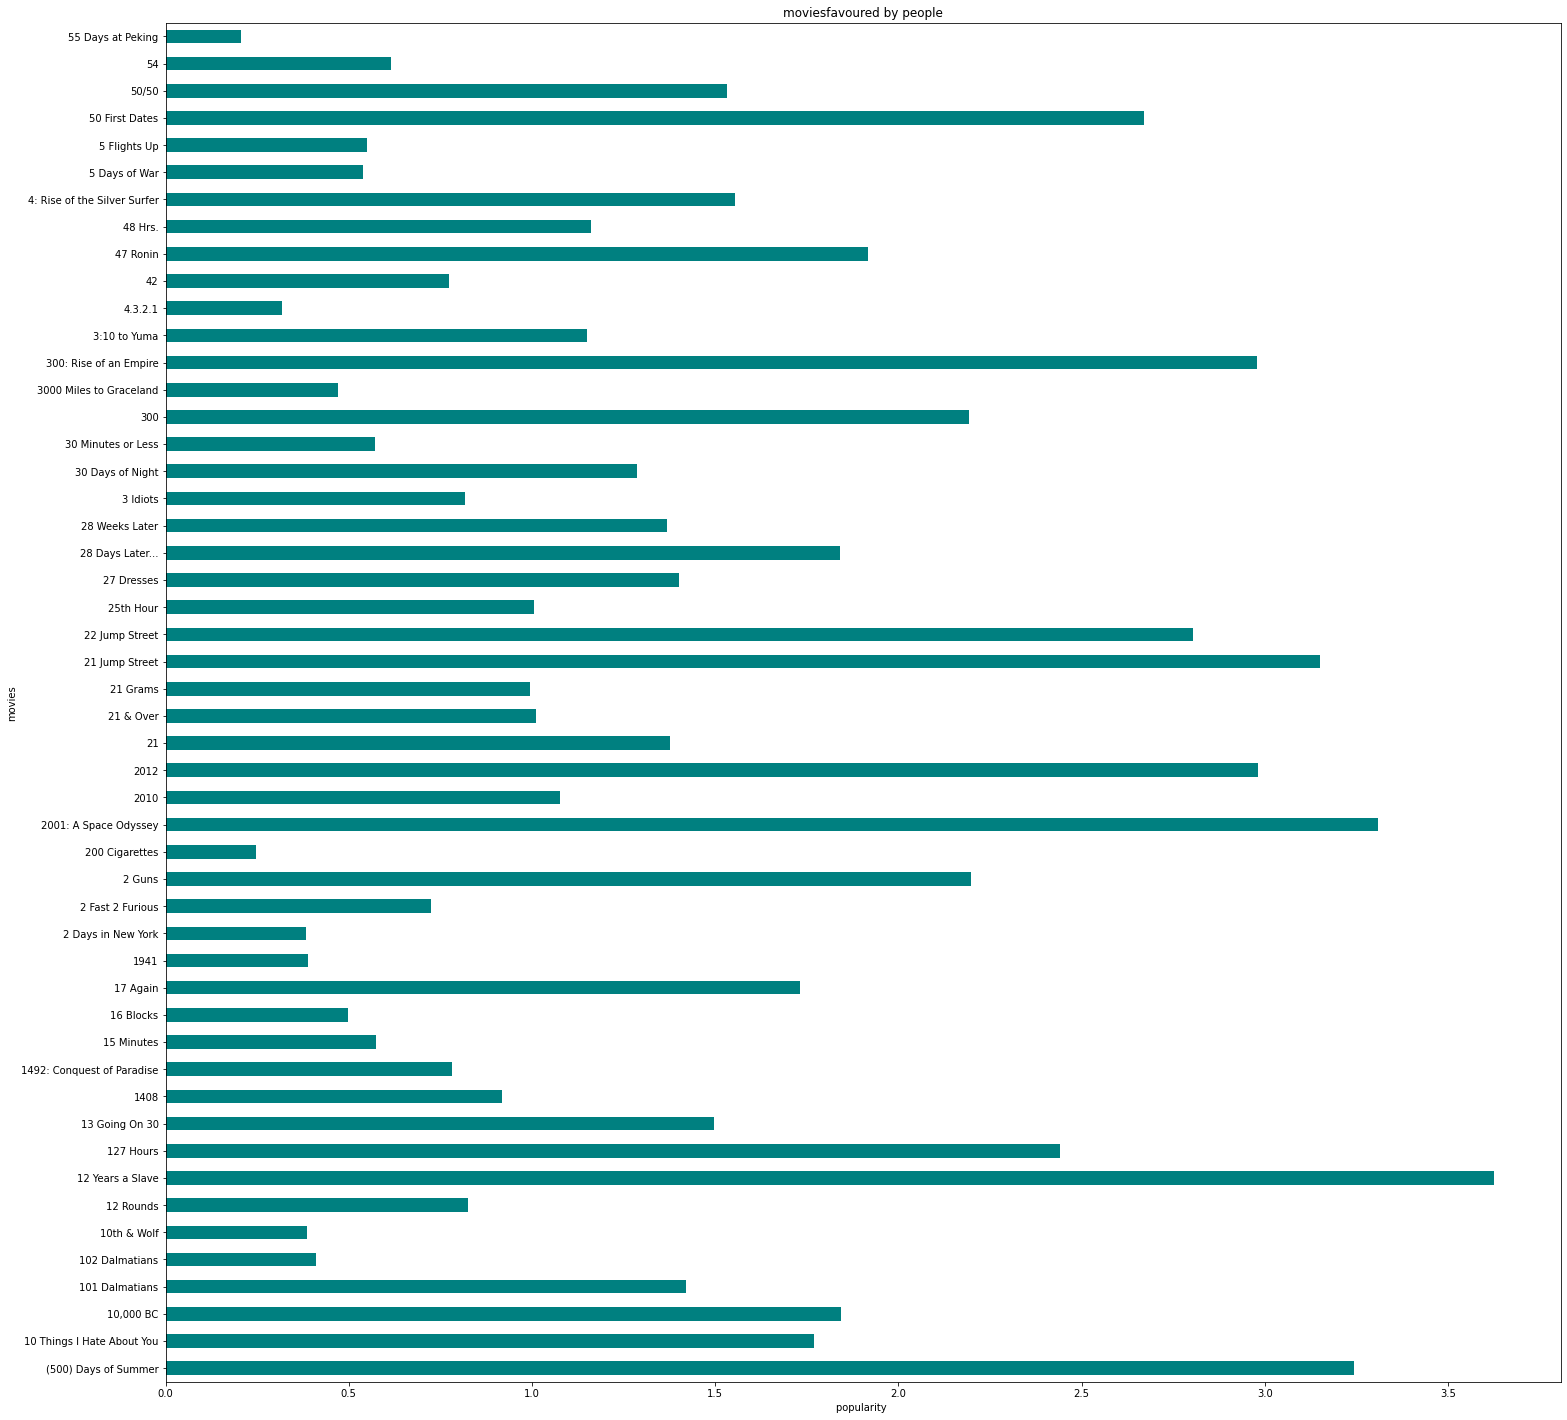

In [270]:
e=df_rz.groupby('original_title')['popularity'].mean()[:50];
e.plot(kind="barh",figsize=(25,25),color = 'teal');
plt.title("moviesfavoured by people");
plt.ylabel("movies");
plt.xlabel("popularity ");


From the above plot :
The most favoured movie by the people is 12 years a slave

<a id='conclusions'></a>
## Conclusions

After investigating The data set we find that :

Steven Spielberg is the director with most movies that made high profit.

Renny Harlin is the director with most movies that were big losses.

The most frequent genre in high profit movies is action while the most fequent genre in losses is drama.

The majority of high profit movies are action, comedy, drama or adventure.

The average runtime of a high profit movie is 116 minutes.

The most favoured movie by the people is 12 years a slave.

Here we see that the top four production companies of the high profit movies are : Twentieth century fox film corporation , universal pictures , paramount pictures , walt disney pictures.

The average budget for movies with high profit movies is 7.827280e+07
from the graph plot of (2015) and (2014) are the years with the most popular movies .

Here are the years of the biggest losses and largest profits which are 2009,2014 respectivly.

As budget increases, the popularity seems to show an increasing trend.

We can say that investment seems to affect returns positively for a movie (posstive correlation).

Limitations The dataset has missing values for the revenue ,budget and profit.

The charachteristics of the movie can not guarantee the success or the faliure of it.

I dropped some rows maybe it will have an affect on insights

The drama genre is very frequent so they appear in the most popular, least popular and different profit categories of the movies.

